In [1]:
car_img_path = "car1.jpeg"

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import cv2

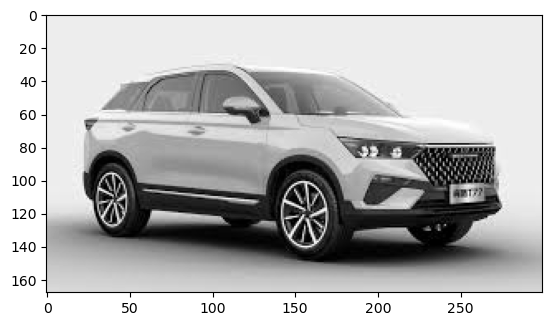

In [3]:
def read_img(path, grayscale=True):
    img = cv2.imread(path)
    
    if grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img, cmap="gray")
    plt.show()
    
    return img
car_img_path = "car1.jpeg"
car = read_img(car_img_path)


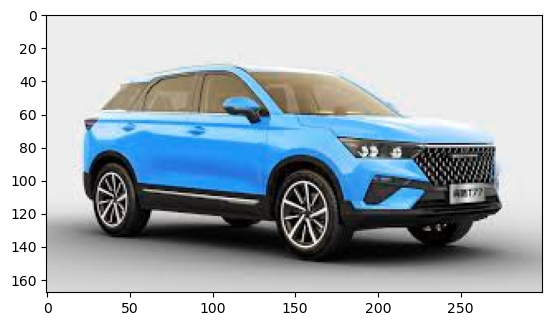

In [4]:
color_car = read_img(car_img_path, grayscale=False)

In [5]:
car.shape

(168, 300)

In [6]:
color_car.shape

(168, 300, 3)

In [7]:
# (1,r,c,1)
row,col = car.shape
car = car.reshape(1,row,col,1) # grayscale
# color_car = color_car.reshape(1,row,col,3) # colored
car.shape

(1, 168, 300, 1)

In [8]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
out = conv_model.predict(car)

1/1 [==============================] - 0s 116ms/step


In [10]:
out.shape

(1, 166, 298, 1)

In [11]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [12]:
reshape_out.shape

(166, 298)

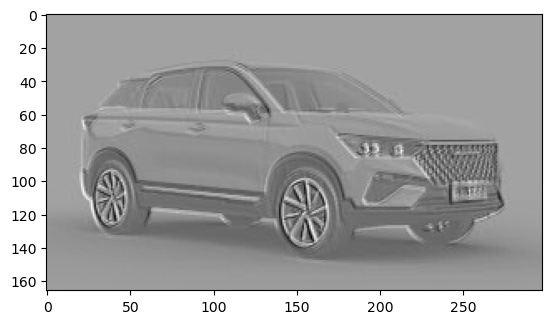

In [13]:
plt.imshow(reshape_out, cmap="gray")

In [14]:
# (1,r,c,1)
row,col,depth = color_car.shape
# car = car.reshape(1,row,col,1) # grayscale
color_car = color_car.reshape(1,row,col,depth) # colored
color_car.shape

(1, 168, 300, 3)

In [15]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:])]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
out = conv_model.predict(color_car)

1/1 [==============================] - 0s 45ms/step


In [17]:
out.shape

(1, 166, 298, 1)

In [18]:
row, col = out.shape[1:-1]
reshape_out = out.reshape(row, col)

In [19]:
reshape_out.shape

(166, 298)

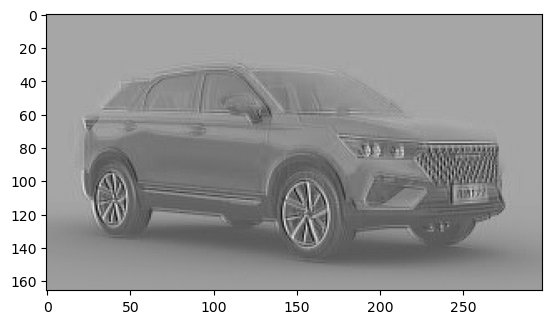

In [20]:
plt.imshow(reshape_out, cmap="gray")

In [21]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters, 
                                      kernel_size=filter_size, 
                                      strides=(1,1),
                                      input_shape=input_shape, 
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

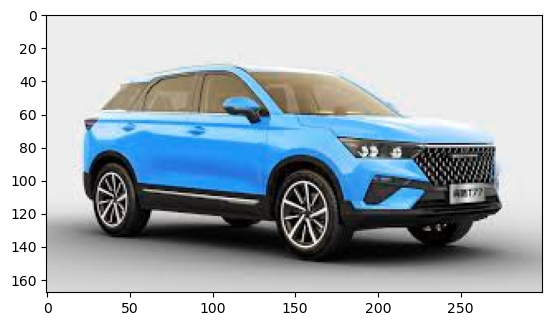

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 45ms/step
(1, 166, 298, 10)


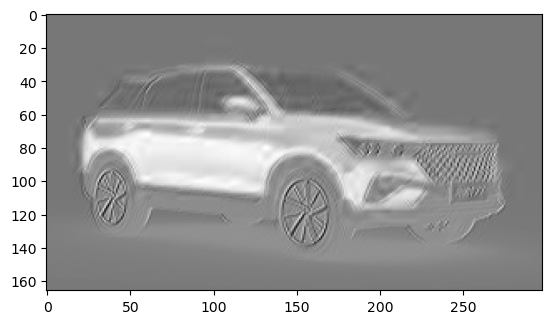

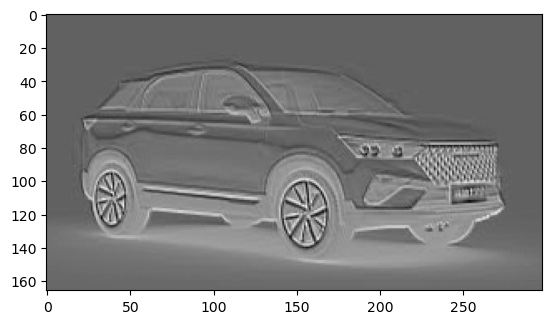

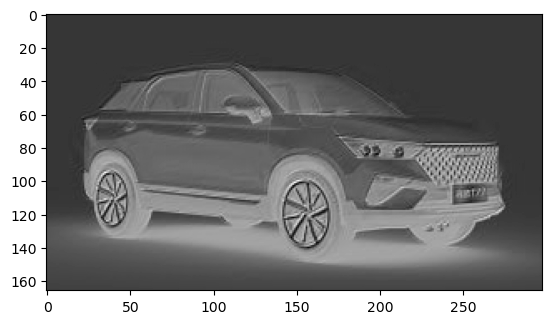

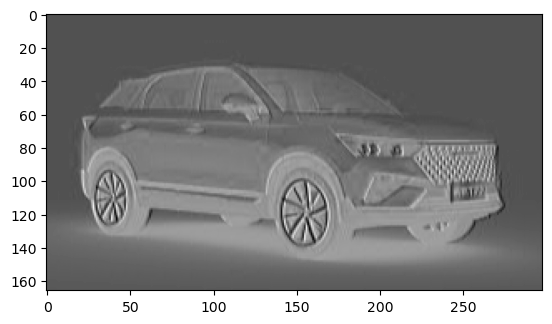

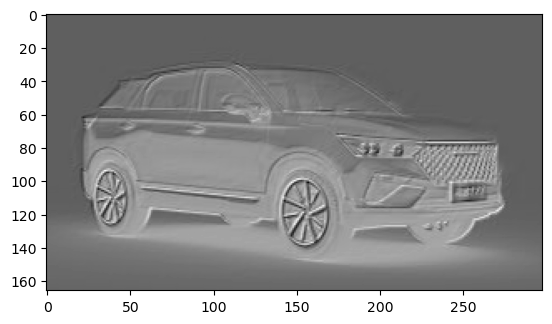

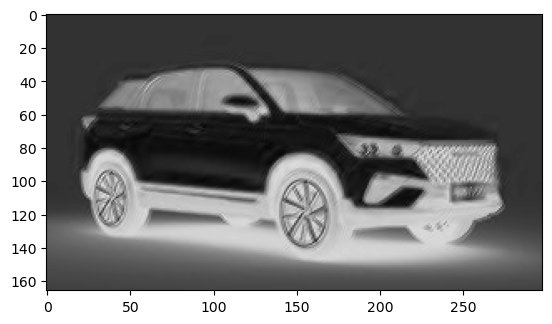

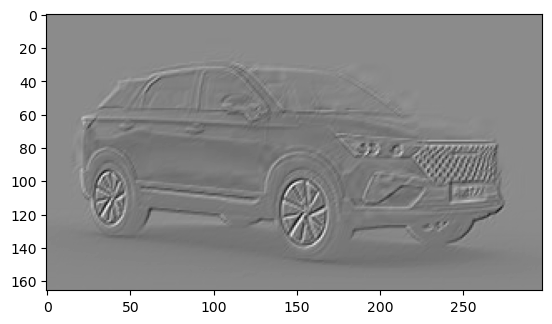

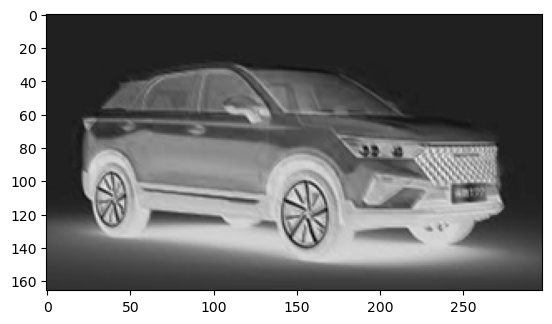

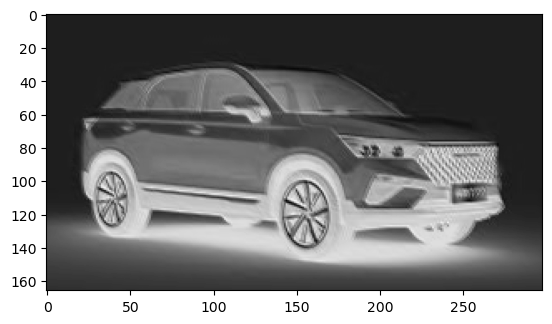

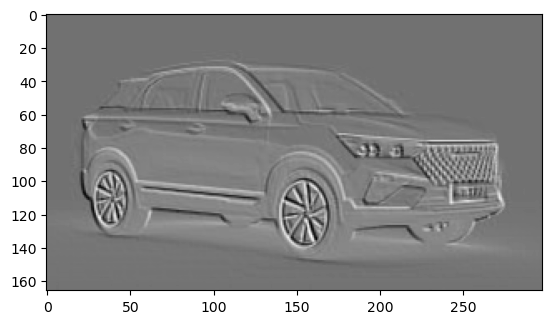

In [22]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

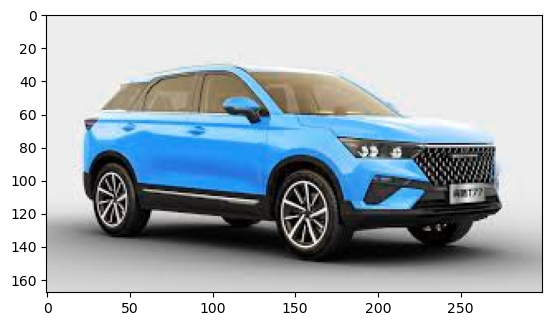

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 168, 300, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 31ms/step
(1, 168, 300, 10)


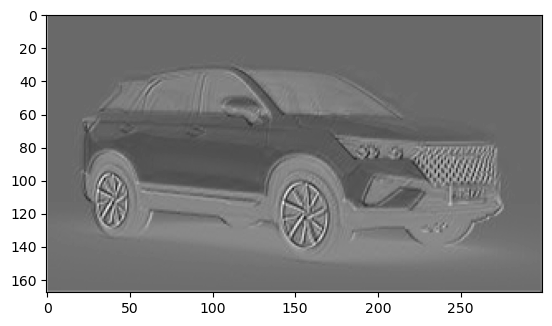

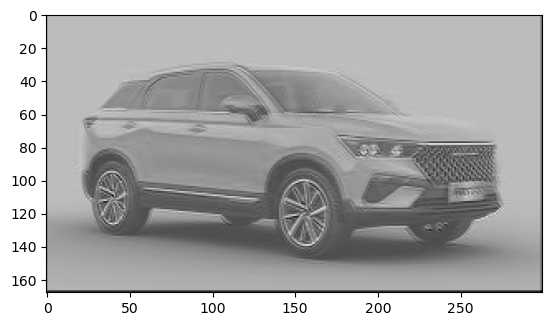

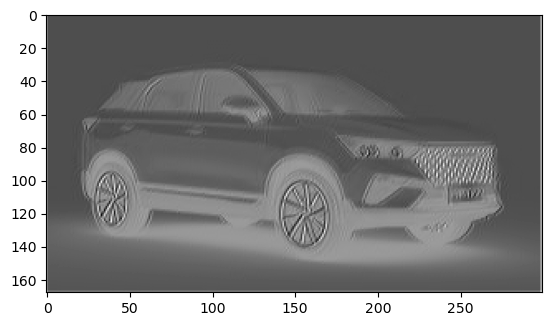

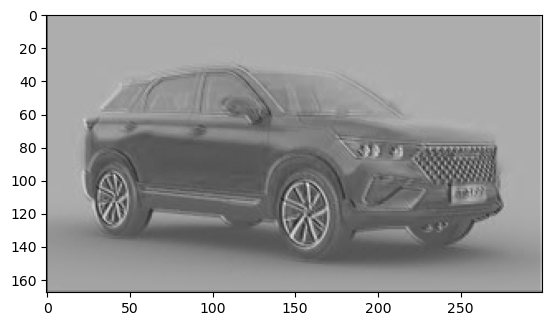

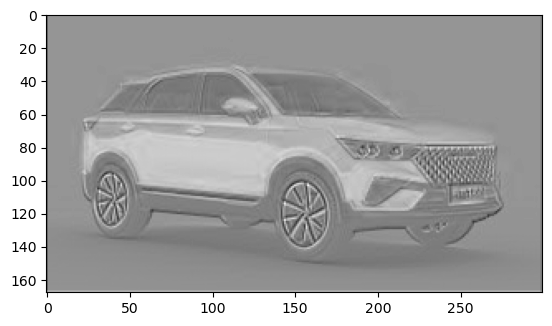

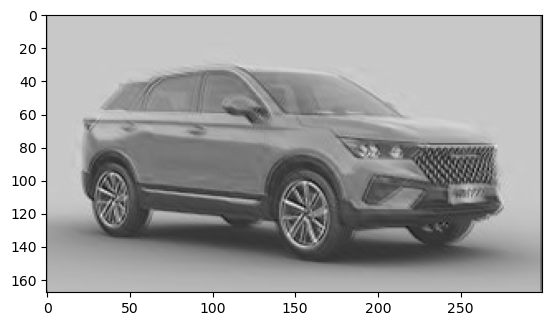

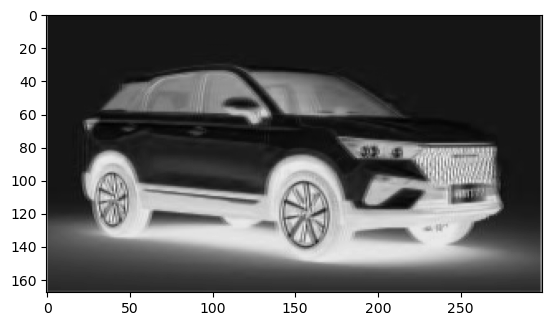

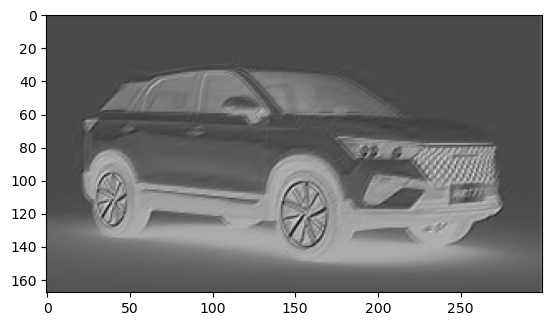

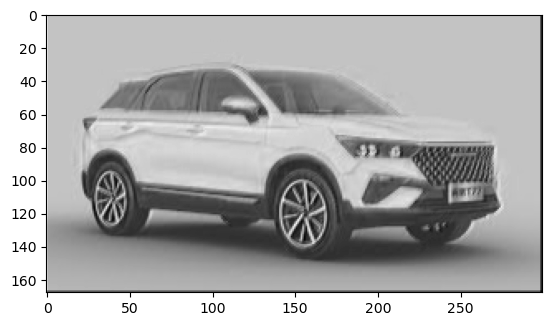

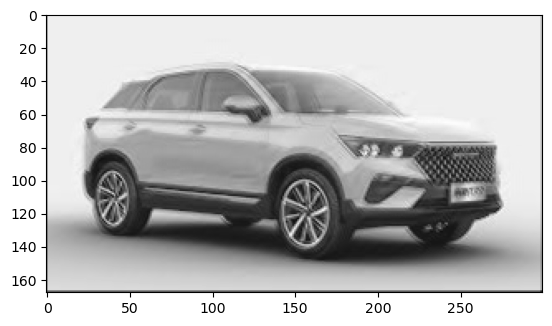

In [23]:
img = read_img(car_img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=10, filter_size=(3,3), strides=(1,1), input_shape=input_img.shape[1:], padding="same")
apply_conv_model_and_visualize(input_img, model)

In [24]:

def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

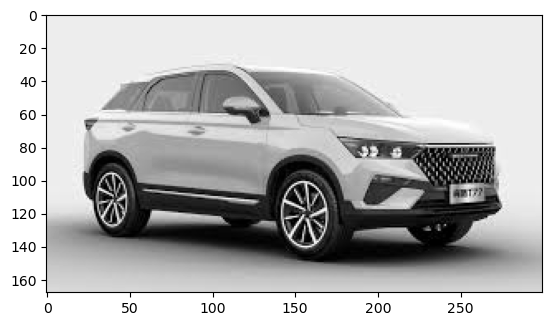

(168, 300)
(1, 84, 150, 1)


In [25]:
img = read_img(car_img_path)
print(img.shape)
result = max_pooling(img)
print(result.shape)


In [26]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape = tf.reshape(result, (row, col))
  plt.imshow(reshape, cmap="gray")

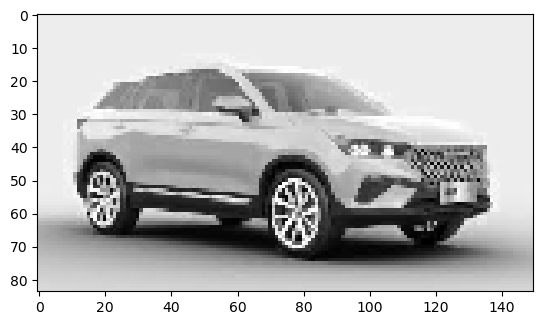

In [27]:
plot_pooling(result)

In [28]:
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))

In [29]:
result = max_pooling(reshape.numpy())
print(result.shape)

(1, 42, 75, 1)


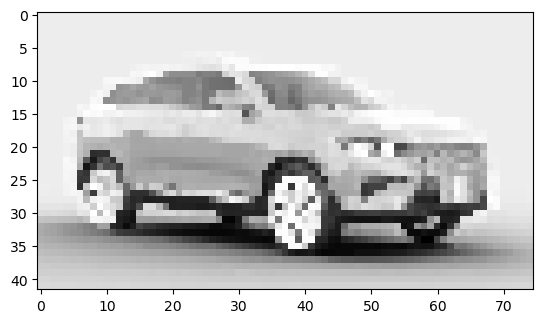

In [30]:
plot_pooling(result)


# GlobalAvgPool2D

In [31]:

def global_avg_pooling(img, grayscale):

  reshaped_img = reshaping_in(img, grayscale)
  pooling_layer = tf.keras.layers
  
  result = pooling_layer(reshaped_img)
  return result

In [33]:
import tensorflow as tf

def global_avg_pooling(img, grayscale=False):
    reshaped_img = reshaping_in(img, grayscale)
    pooling_layer = tf.keras.layers.GlobalAveragePooling2D()
    result = pooling_layer(reshaped_img)
    return result


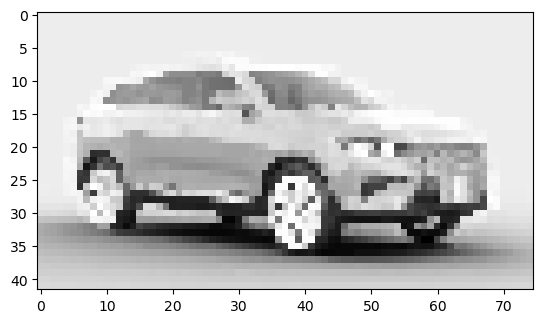

In [34]:
plot_pooling(result)

In [35]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1, 
                                    kernel_size=(3,3), 
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:],
                                    activation="relu" ),
              tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
              tf.keras.layers.GlobalAveragePooling2D(),
              tf.keras.layers.Dense(10,activation="relu"),
              tf.keras.layers.Dense(2,activation="softmax")]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 83, 149, 1)        0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 1)                 0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 70 (280.00 Byte)
Trainable params: 70 (2